In [1]:
from lightgbm import LGBMClassifier

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
dataset = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(dataset.data,
                                               dataset.target,
                                               test_size=0.2,
                                               random_state=156)
lgbm = LGBMClassifier(n_estimators=400)
evals=[(X_test,y_test)]
lgbm.fit(X_train,y_train,
         early_stopping_rounds=100,
         eval_metric='logloss',
         eval_set=evals,verbose=True)
pred = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [4]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve,roc_auc_score

def get_clf_eval(y_test,pred):
        confusion = confusion_matrix(y_test,pred)
        accuracy = accuracy_score(y_test,pred)
        precision = precision_score(y_test,pred)
        recall = recall_score(y_test,pred)
        f1 = f1_score(y_test,pred)
        roc_auc = roc_auc_score(y_test,pred)
        print('오차행렬')
        print(confusion)
        print(f'정확도:{accuracy:.4f} 정밀도:{precision:.4f} 재현율:{recall:.4f} F1:{f1:.4f} AUC:{roc_auc:.4f}')

In [5]:
get_clf_eval(y_test,pred)

오차행렬
[[33  4]
 [ 1 76]]
정확도:0.9561 정밀도:0.9500 재현율:0.9870 F1:0.9682 AUC:0.9395


In [6]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

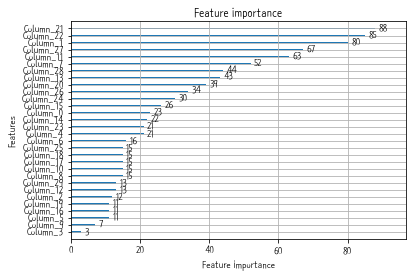

In [9]:
fig,ax = plt.subplots()
plot_importance(lgbm,ax=ax)